# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Profa. Andreza C. Beezão Moreira (DMM/UFLA)
#### Prof. Mayron César O. Moreira (DCC/UFLA)
#### Aluno: Bruno Crespo Ferreira

## Problema

Considere um grafo não-direcionado e conexo $G = (V,A)$. Pretende-se encontrar uma partição de vértices $V_1$ e $V_2$ tal que $V_1 ∪ V_2 = V$, e que a cardinalidade do conjunto de arestas entre $V_1 \ \text{e} \ V_2$ seja maximizada. Diante disso, faça um modelo inteiro que resolva o problema descrito.

## Gerando um grafo não-direcionado conexo

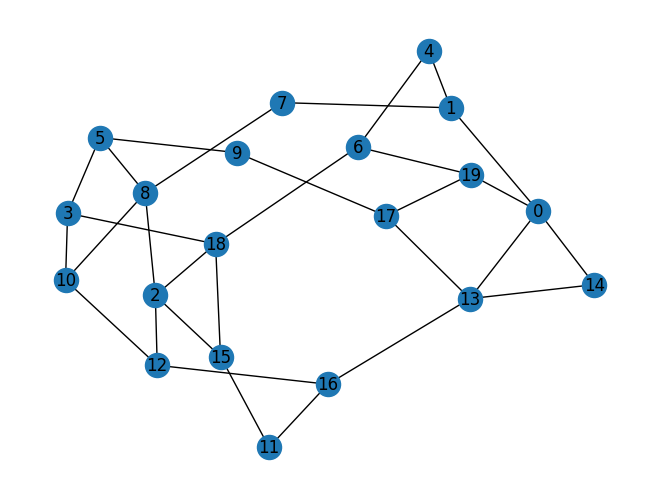

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
  if(m < n - 1 or m > n * (n - 1) // 2):
    return None

  grafo = nx.Graph()
  vertices = list(range(n))
  grafo.add_nodes_from(vertices)
  random.shuffle(vertices)
  for i in range(n - 1):
    grafo.add_edge(vertices[i], vertices[i + 1])

  while grafo.number_of_edges() < m:
    u, v = random.sample(vertices, 2)
    if not grafo.has_edge(u, v):
      grafo.add_edge(u, v)

  return grafo

n = 20
m = 30
grafo = gera_grafo_nao_direcionado_conexo(n, m)

if(grafo != None):
  nx.draw(grafo, with_labels=True)
  plt.show()

## Modelagem Matemática

### Parâmetros

* $n$: Número de vertices;
* $m$: Número de arestas;
* $V$: Conjunto de vértices;
* $A$: Conjunto de arestas.

### Variáveis

* $x_{i}$: Variável binária que indica se o vértice $i ∈ V$ pertence ao conjunto $V_1 \ (x_i = 1)$ ou $V_2 \ (x_i = 0)$;
* $y_{ij}$: Variável binária que indica se a aresta $(i,j)$ pertence ao conjunto de arestas entre $V_1$ e $V_2 \ (y_{ij} = 1)$.

### Função Objetivo

Consiste em **maximizar** a cardinalidade do conjunto de arestas entre $V_1$ e $V_2$.
\begin{equation}
max \sum_{(i,j) \in A} y_{ij}
\end{equation}

### Restrições

* Restrição 1 e 2: Para cada aresta $(i,j) \in A, y_{ij} = 1$ se e somente se os vértices $i$ e $j$ estiverem em conjuntos diferentes $(x_i \ne x_j)$.
\begin{alignat}{2}
y_{ij} \le x_{i} + x_{j} \quad ∀ (i,j) \in A \\
y_{ij} \le 2 - (x_i + x_j) \quad ∀ (i,j) \in A
\end{alignat}

* Restrição 3: se $x_i = x_j$, então $y_{ij}$ deve ser 0.
\begin{equation}
y_{ij} \ge |x_i - x_j| \quad ∀ (i,j) \in A
\end{equation}

### Modelo

\begin{equation}
max \sum_{(i,j) \in A} y_{ij}
\end{equation}

sujeito a:

\begin{alignat}{2}
y_{ij} \le x_{i} + x_{j} \quad ∀ (i,j) \in A \\
y_{ij} \le 2 - (x_i + x_j) \quad ∀ (i,j) \in A \\
y_{ij} \ge |x_i - x_j| \quad ∀ (i,j) \in A
\end{alignat}

## Resolução utilizando o Gurobi

In [2]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 52.3 MB/s eta 0:00:00


### Declaração do objeto que representa o modelo matemático

In [8]:
from gurobipy import Model, GRB, quicksum

# Conjuntos de vértices e arestas
V = list(grafo.nodes)
A = list(grafo.edges)

modelo = Model("Maximizar Conjunto de Arestas")

### Variáveis de decisão

In [9]:
x = modelo.addVars(V, vtype=GRB.BINARY, name="x")
y = modelo.addVars(A, vtype=GRB.BINARY, name="y")

### Função objetivo

In [10]:
modelo.setObjective(quicksum(y), GRB.MAXIMIZE)

<ipython-input-10-162b81b5f25e>:1: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  modelo.setObjective(quicksum(y), GRB.MAXIMIZE)


### Restrições

In [11]:
for (i, j) in A:
  modelo.addConstr(y[i, j] <= x[i] + x[j], f"restr1_{i}_{j}")
  modelo.addConstr(y[i, j] <= 2 - (x[i] + x[j]), f"restr2_{i}_{j}")
  # Reescrevendo a restrição 3 utilizando desigualdades lineares equivalentes
  modelo.addConstr(y[i, j] >= x[i] - x[j], f"restr3_{i}_{j}_1")
  modelo.addConstr(y[i, j] >= x[j] - x[i], f"restr3_{i}_{j}_2")

### Resolvendo o problema

In [12]:
modelo.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 120 rows, 50 columns and 360 nonzeros
Model fingerprint: 0x7f109c40
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 70 rows and 10 columns
Presolve time: 0.00s
Presolved: 50 rows, 40 columns, 150 nonzeros
Found heuristic solution: objective 10.0000000
Variable types: 0 continuous, 40 integer (35 binary)

Root relaxation: objective 3.000000e+01, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent  

### Imprimindo as soluções do problema

Solução ótima encontrada:
Conjunto V1:
[1, 3, 6, 8, 9, 12, 13, 14, 15, 19]
Conjunto V2:
[0, 2, 4, 5, 7, 10, 11, 16, 17, 18]
Número de arestas entre V1 e V2:
26


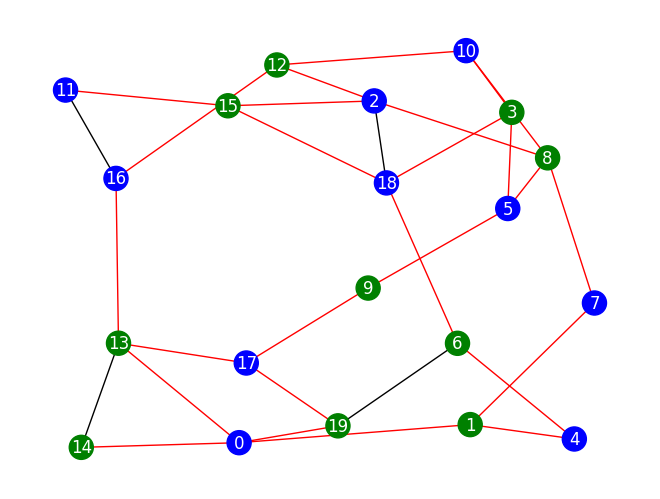

In [15]:
if modelo.status == GRB.OPTIMAL:
  print("Solução ótima encontrada:")
  print("Conjunto V1:")
  V1 = [i for i in V if x[i].x > 0.5]
  print(V1)
  print("Conjunto V2:")
  V2 = [i for i in V if x[i].x <= 0.5]
  print(V2)
  print("Número de arestas entre V1 e V2:")
  print(int(modelo.objVal))

  # Desenhando o grafo
  node_colors = ["green" if i in V1 else "blue" for i in V]
  edge_colors = ["red" if y[i, j].x > 0.5 else "black" for (i, j) in A]
  pos = nx.spring_layout(grafo)
  nx.draw(grafo, pos, with_labels=True, edge_color=edge_colors, node_color=node_colors, font_color="white")
  plt.show()
else:
  print("Nenhuma solução ótima encontrada.")